# Data Preparation Dataset Seguros

# Import libraries

In [ ]:
#importamos librería
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
# MinMaxScaler es para normalizar un dataset
# StandardScaler es para normalizar un dataset
# LabelEncoder sirve para normalizar labels, también normaliza labels no-numéricas
# mientras tengan posicionamiento y sean comparables

import warnings
warnings.filterwarnings('ignore')
# never print matching warnings

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# accuracy_score ccuracy classification score.In multilabel classification, this function computes subset accuracy:
# the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

#f1_score Compute the F1 score, also known as balanced F-score or F-measure.
# The F1 score can be interpreted as a harmonic mean of the precision and recall
# where an F1 score reaches its best value at 1 and worst score at 0.

# precision_score Compute the precision.The precision is the ratio tp / (tp + fp)
# where tp is the number of true positives and fp the number of false positives.
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
# The best value is 1 and the worst value is 0.

# recall_score Compute the recall. The recall is the ratio tp / (tp + fn)
# where tp is the number of true positives and fn the number of false negatives.
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The best value is 1 and the worst value is 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import files

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semana6_DataScience_Python/Datasets/dataset_seguros_con_nulos.csv", sep=";", encoding='utf-8')

print('Dimensiones:', df.shape)
df.info()

Dimensiones: (1338, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1338 non-null   int64  
 1   SEXO         1334 non-null   object 
 2   IMC          1334 non-null   float64
 3   PESO         1335 non-null   float64
 4   HIJOS        1334 non-null   float64
 5   TIENE_HIJOS  1338 non-null   int64  
 6   FUMADOR      1334 non-null   object 
 7   CIUDAD       1338 non-null   object 
 8   PRECIO       1338 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 94.2+ KB


In [ ]:
df.head()

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,80.0,2.0,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,71.0,0.0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,83.0,1.0,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,64.0,0.0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,97.0,0.0,0,NO,BARCELONA,1102


# Data cleaning

## 1. Nulos

In [ ]:
df.isnull().sum()

EDAD           0
SEXO           4
IMC            4
PESO           3
HIJOS          4
TIENE_HIJOS    0
FUMADOR        4
CIUDAD         0
PRECIO         0
dtype: int64

## 2. Duplicados

In [ ]:
df[df.duplicated(keep=False)]
# Tenemos un duplicado

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
378,19,MASCULINO,30.59,82.0,0.0,0,NO,SEVILLA,137
459,19,MASCULINO,30.59,82.0,0.0,0,NO,SEVILLA,137


In [ ]:
n = df.shape
df.drop_duplicates(inplace=True)
print('Dropping duplicates:', n, df.shape[0])

Dropping duplicates: (1338, 9) 1337


# EDA: Análisis

## Univariable

In [ ]:
def dist_report(df_, percentiles=[0.25,0.5,0.75]):
    def dtype_null(df_x):
        a = pd.DataFrame(df_x.dtypes, columns=['dtype'])
      # El código originalmente tenía llaves lo cual indica que está esperando un diccionario
      # Los diccionarios no se pueden hace set() por eso marcaba error
        b = pd.DataFrame(df_x.isna().sum(), columns=['nulls'])
        b['%nulls'] = round(100*b['nulls']/ df_x.shape[0],2)
        return a.join(b)

    # Numeric
    num_df = df_.select_dtypes(include=['number'])
    num_report = num_df.describe(percentiles=percentiles).transpose()
    num_report_all = dtype_null(num_df).join(num_report).sort_values('dtype')

    # Categoric
    cat_df = df_.select_dtypes(exclude=['number'])
    cat_report = cat_df.describe().transpose()
    cat_report_all = dtype_null(cat_df).join(cat_report).sort_values('dtype')

    return num_report_all, cat_report_all

In [ ]:
num_report, cat_report = dist_report(df)
num_report

,dtype,nulls,%nulls,count,mean,std,min,25%,50%,75%,max
EDAD,int64,0,0.00,1337.0,39.222139,14.044333,18.00,27.00,39.0,51.0,64.00
TIENE_HIJOS,int64,0,0.00,1337.0,0.569185,0.495376,0.00,0.00,1.0,1.0,1.00
PRECIO,int64,0,0.00,1337.0,1106.578908,1009.190956,93.00,396.00,782.0,1388.0,5314.00
IMC,float64,4,0.30,1333.0,30.670300,6.105783,15.96,26.29,30.4,34.7,53.13
PESO,float64,3,0.22,1334.0,82.455022,16.412509,43.00,71.00,82.0,93.0,143.00
HIJOS,float64,4,0.30,1333.0,1.093023,1.207604,0.00,0.00,1.0,2.0,5.00


In [ ]:
cat_report

,dtype,nulls,%nulls,count,unique,top,freq
SEXO,object,4,0.3,1333,2,MASCULINO,673
FUMADOR,object,4,0.3,1333,2,NO,1059
CIUDAD,object,0,0.0,1337,4,MADRID,364


In [ ]:
# Visualizar distribucion de todas las variables categóricas
df_cat = df.select_dtypes(include=['object'])
list(df_cat.columns)

['SEXO', 'FUMADOR', 'CIUDAD']

In [ ]:
df_cat.head()

,SEXO,FUMADOR,CIUDAD
0,MASCULINO,NO,BARCELONA
1,MASCULINO,NO,BARCELONA
2,FEMENINO,NO,BARCELONA
3,MASCULINO,NO,BARCELONA
4,FEMENINO,NO,BARCELONA


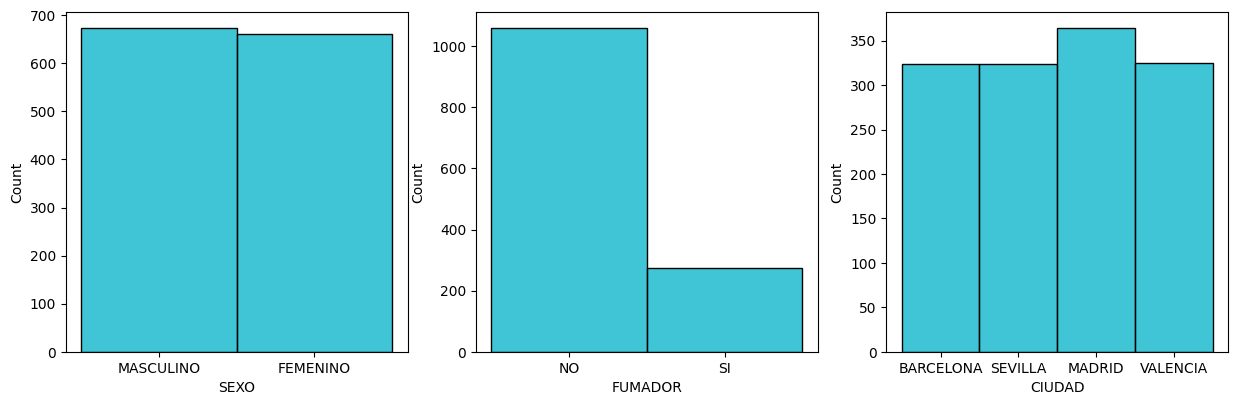

In [ ]:
plt.figure(figsize=(15, 15))
features = df_cat.columns
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.histplot(df_cat[i[1]],color = '#00b2ca')
    #plt.xticks(rotation=20)
plt.show()

In [ ]:
df.FUMADOR.value_counts()

NO    1059
SI     274
Name: FUMADOR, dtype: int64

In [ ]:
df.FUMADOR.value_counts()/df.shape[0]*100

NO    79.207180
SI    20.493642
Name: FUMADOR, dtype: float64

In [ ]:
# Visualizar distribucion de todas las variables numéricas
df_num = df.select_dtypes(include=['int64','float64'])
list(df_num.columns)

['EDAD', 'IMC', 'PESO', 'HIJOS', 'TIENE_HIJOS', 'PRECIO']

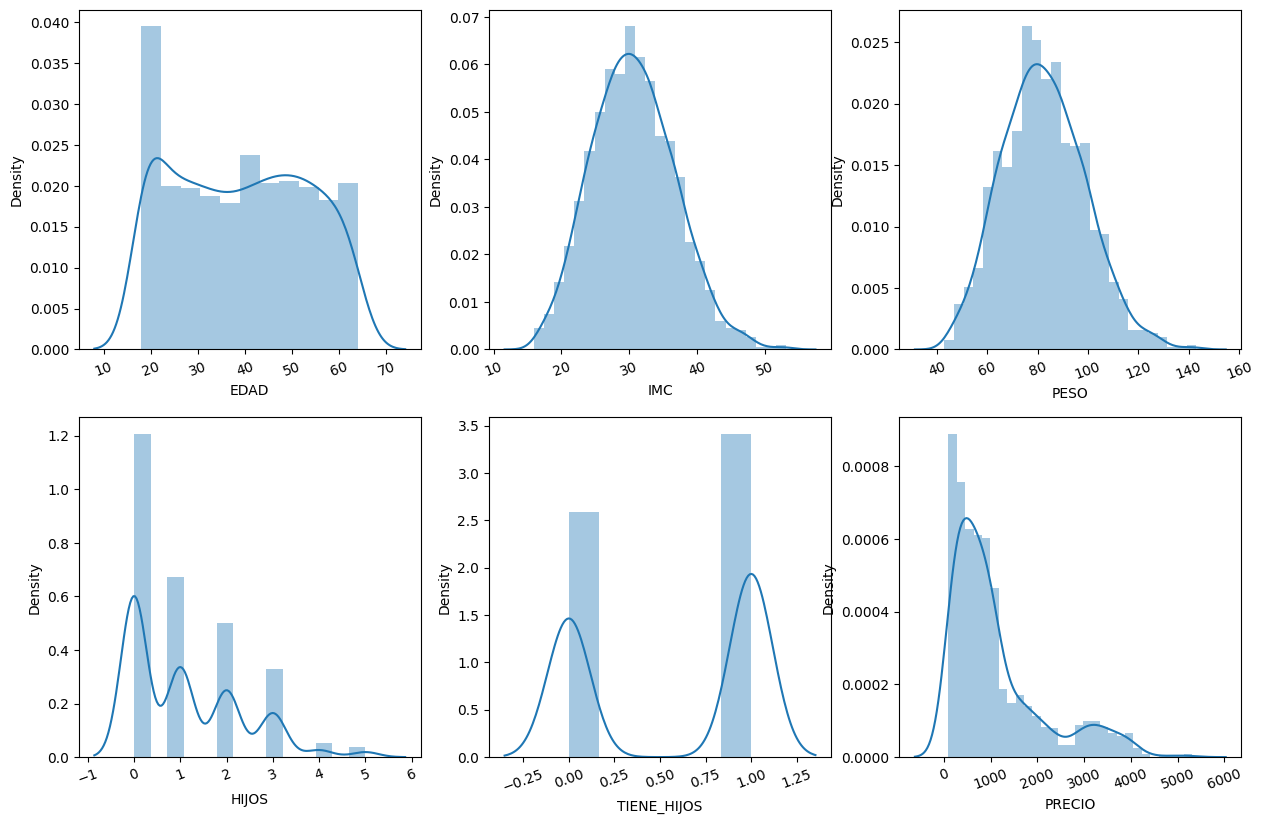

In [ ]:
plt.figure(figsize=(15, 15))
features = df_num.columns[0:]
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df_num[i[1]])
    plt.xticks(rotation=20)

# IMC tiene forma de campana de Gauss

In [ ]:
#El precio está afectado por una distribución de skewed, se recomienda normalizarlo para que siga una distribución normal
df["LOG_PRECIO"] = np.log10(df["PRECIO"])

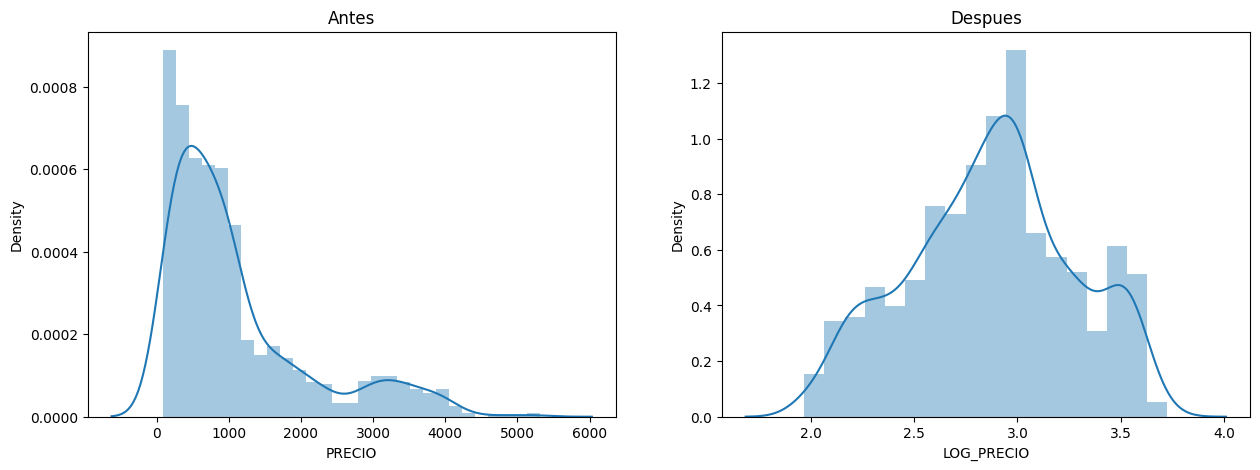

In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1,2,1)
sns.distplot(df["PRECIO"]).set_title('Antes')
ax = plt.subplot(1,2,2)
sns.distplot(df["LOG_PRECIO"]).set_title('Despues')
plt.show()

In [ ]:
# En logaritmo tiene a tener distribución normal, ya que en cuestiones de precio nos interesa mas el orden de magnitud antes que el precio

## Multivariable

In [ ]:
df.corr()

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO,LOG_PRECIO
EDAD,1.000000,0.108806,0.110727,0.042593,0.044213,0.298308,0.526933
IMC,0.108806,1.000000,0.999835,0.010973,0.014204,0.197861,0.132259
PESO,0.110727,0.999835,1.000000,0.012736,0.015613,0.199698,0.134554
HIJOS,0.042593,0.010973,0.012736,1.000000,0.788619,0.067988,0.160197
TIENE_HIJOS,0.044213,0.014204,0.015613,0.788619,1.000000,0.061246,0.149085
PRECIO,0.298308,0.197861,0.199698,0.067988,0.061246,1.000000,0.893079
LOG_PRECIO,0.526933,0.132259,0.134554,0.160197,0.149085,0.893079,1.000000


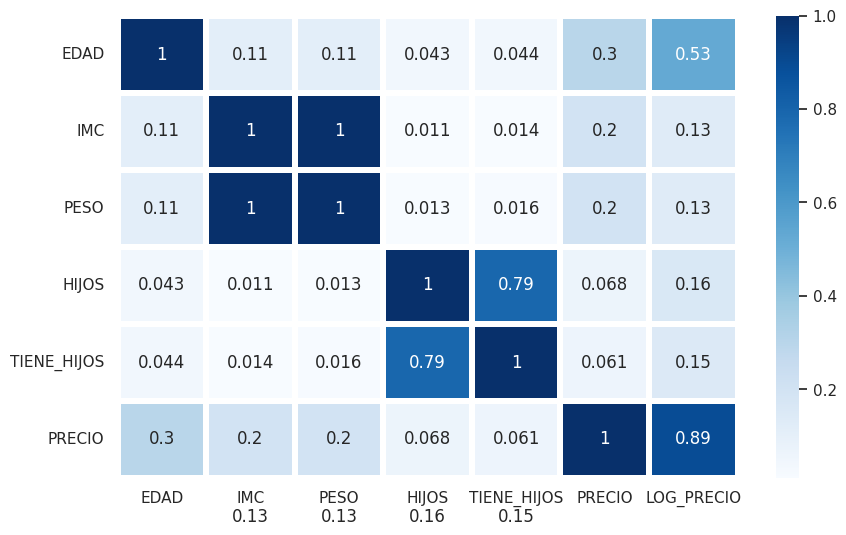

In [ ]:
#Correlation matrix
corr = df.corr()
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
ax=sns.heatmap(df.corr(),cmap='Blues', annot=True, linewidths=3,fmt=".2g", annot_kws={"size":12}) # font size
ax.set_ylim(6.0, 0)
plt.show()

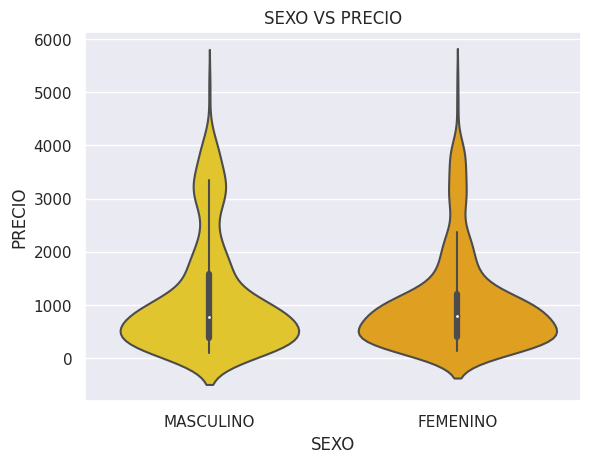

In [ ]:
#SEXO VS PRECIO
sns.violinplot(x="SEXO",y="PRECIO", data=df, palette="Wistia").set_title('SEXO VS PRECIO')
plt.show()

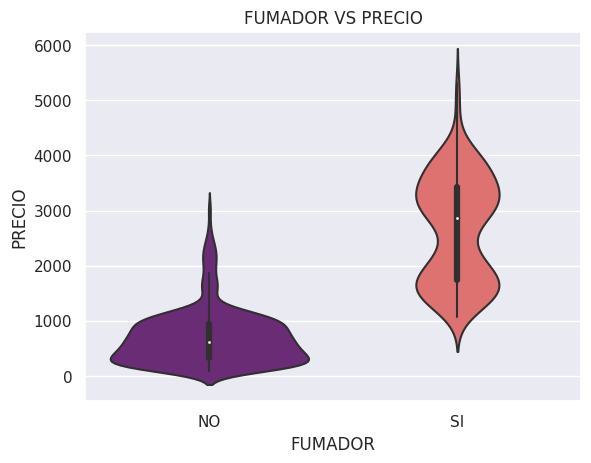

In [ ]:
#FUMADOR VS PRECIO
sns.violinplot(x="FUMADOR",y="PRECIO", data=df, palette="magma").set_title('FUMADOR VS PRECIO')
plt.show()

# Los que no fuman, el precio no excede los 3,000
# Los que fuman se vende un seguro hasta 6,000

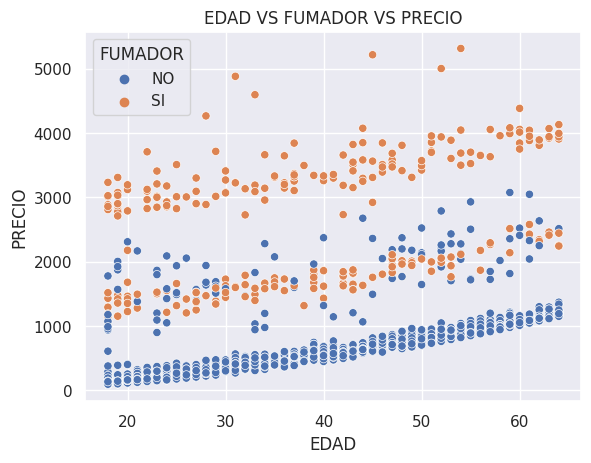

In [ ]:
#EDAD VS FUMADOR VS PRECIO
sns.scatterplot(x="EDAD", y="PRECIO", hue="FUMADOR",data=df).set_title('EDAD VS FUMADOR VS PRECIO')
plt.show()

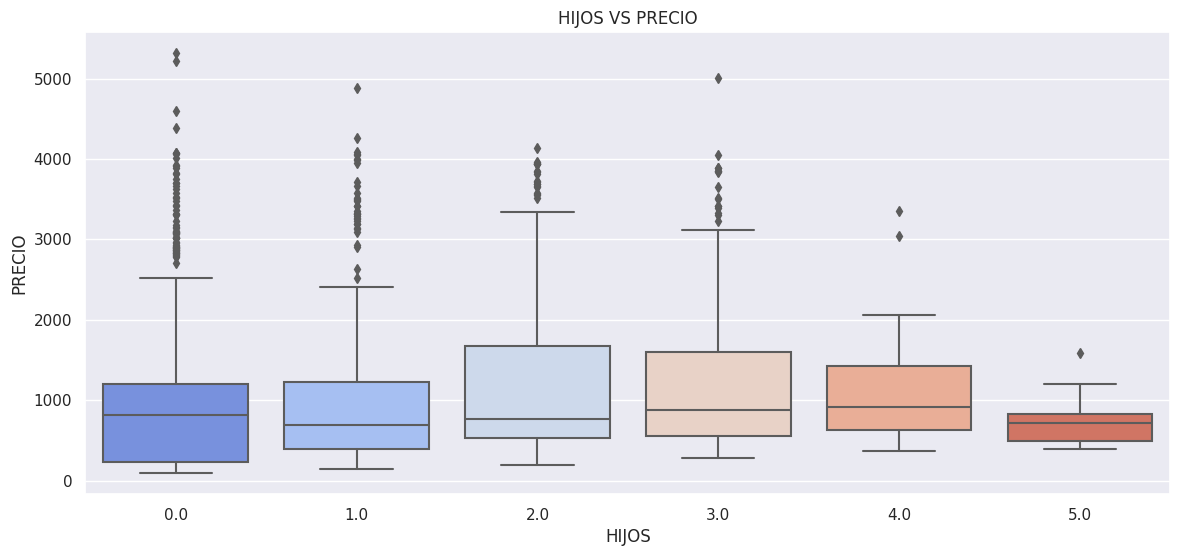

In [ ]:
#RELACION HIJOS VS PRECIO
plt.figure(figsize=(14,6))
sns.boxplot(x="HIJOS",y="PRECIO",  data=df, palette="coolwarm").set_title('HIJOS VS PRECIO')
plt.show()

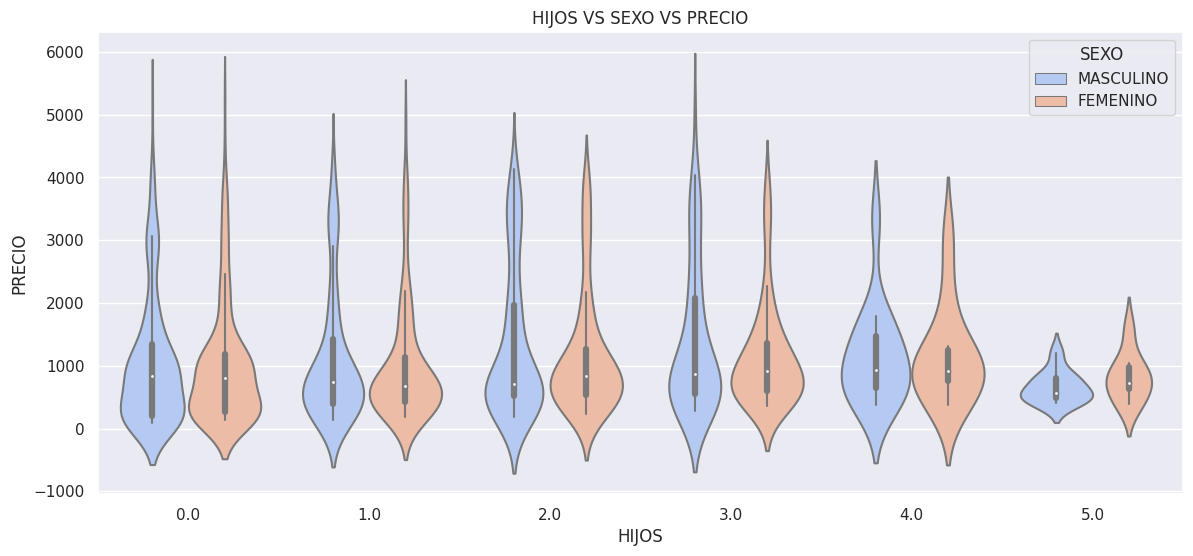

In [ ]:
#RELACION HIJOS VS SEXO VS PRECIO
plt.figure(figsize=(14,6))
sns.violinplot(x="HIJOS",y="PRECIO", hue="SEXO",  data=df, palette="coolwarm").set_title('HIJOS VS SEXO VS PRECIO')
plt.show()

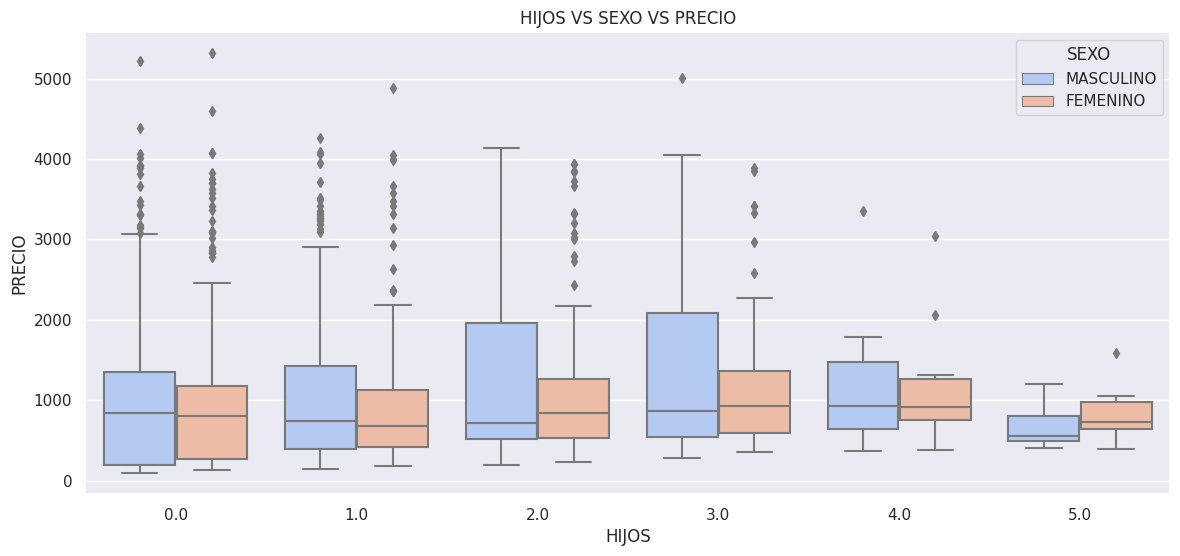

In [ ]:
#RELACION HIJOS VS SEXO VS PRECIO
plt.figure(figsize=(14,6))
sns.boxplot(x="HIJOS",y="PRECIO", hue="SEXO",  data=df, palette="coolwarm").set_title('HIJOS VS SEXO VS PRECIO')
plt.show()

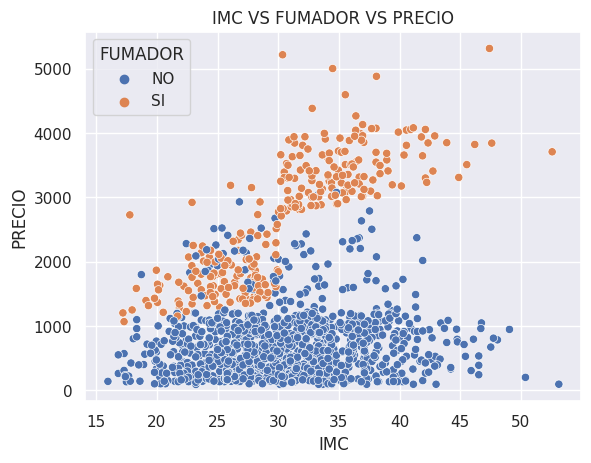

In [ ]:
#IMC VS FUMADOR VS PRECIO
sns.scatterplot(x="IMC", y="PRECIO",hue="FUMADOR",data=df).set_title('IMC VS FUMADOR VS PRECIO')
plt.show()

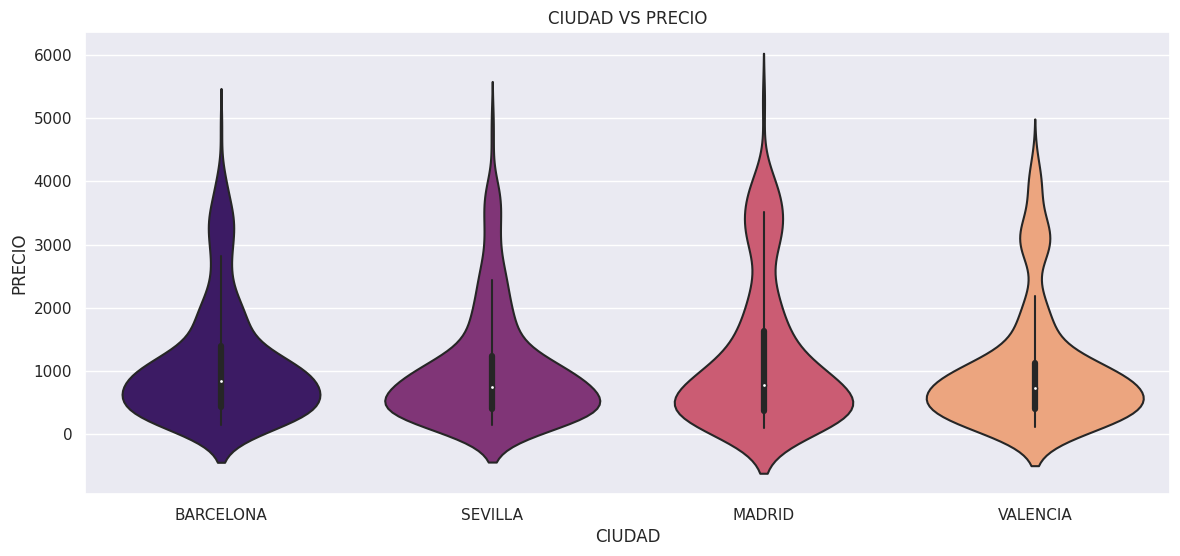

In [ ]:
#CIUDAD VS PRECIO
plt.figure(figsize=(14,6))
sns.violinplot(x="CIUDAD",y="PRECIO", data=df, palette="magma").set_title('CIUDAD VS PRECIO')
plt.show()

# Podemos ver que las distribuciones son practicamente similares

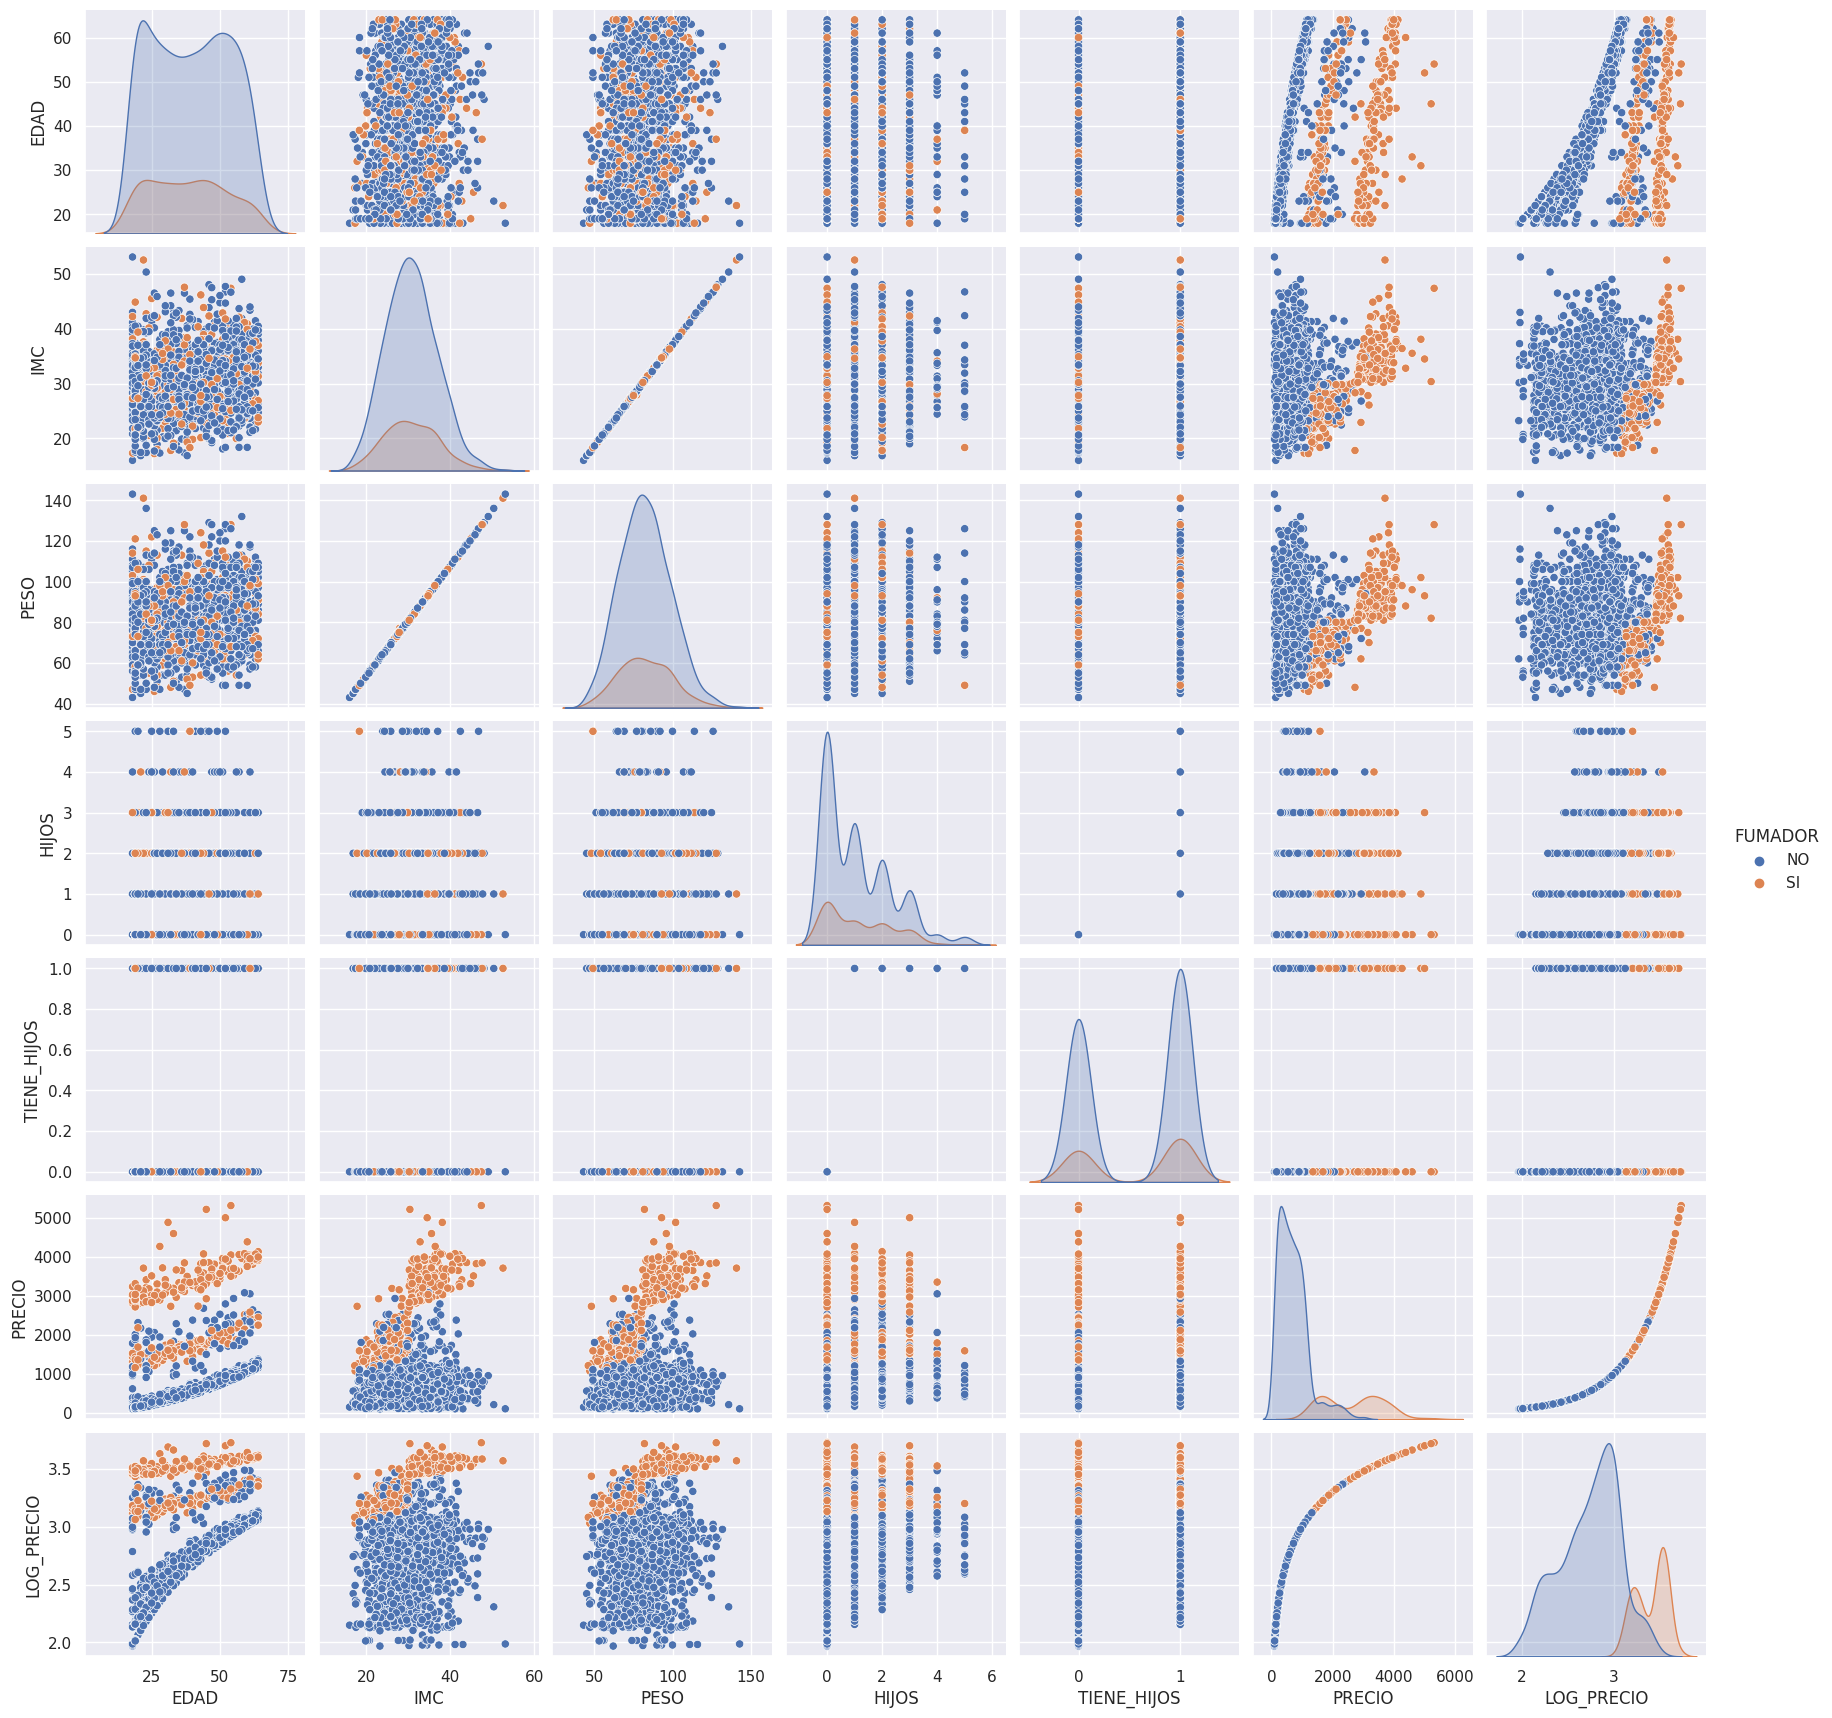

In [ ]:
sns.pairplot(df, hue='FUMADOR')
plt.show()

In [ ]:
def plot_cat_values(dataframe, column, target_column):

    plt.figure(figsize=(15,8))
    ax1 = plt.subplot(2,1,1)

    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.histplot(
        dataframe[column]
    )

    ax2 = plt.subplot(2,1,2, sharex=ax1)

    ## Graficamos la distribución del target
    ax2 = sns.boxenplot(
        data = dataframe,
        x = column,
        y = target_column
    )

    plt.show()

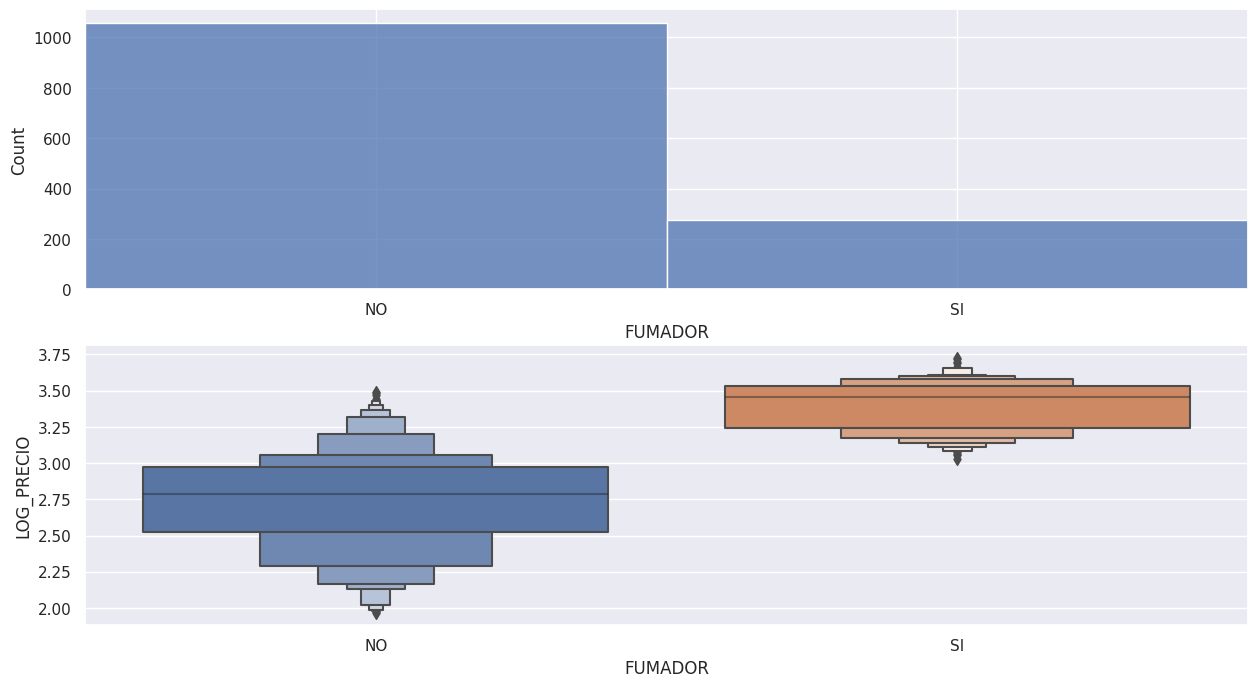

In [ ]:
plot_cat_values(df, 'FUMADOR', 'LOG_PRECIO')

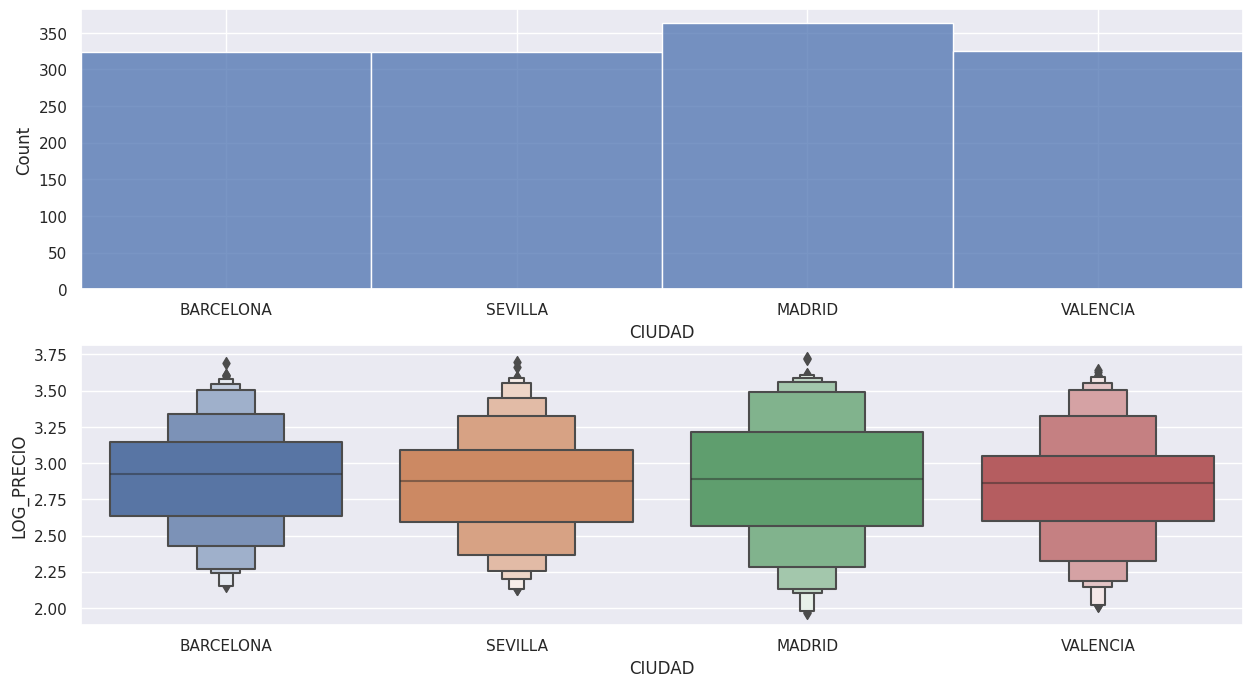

In [ ]:
plot_cat_values(df, 'CIUDAD', 'LOG_PRECIO')

Insights:
* Fumar es una variable de alto peso en el pricing de la poliza de seguro. Los fumadores tienen precios mayores que los no fumadores.
* A mayor edad, mayor precio, pero no es el factor más determinante.
* No hay diferencias significativas en el precio entre hombres y mujeres, si bien los intercuartiles de los hombres ocupan un rango mayor.
* La tenencia de hijos no tiene una correlacion significativa con el precio (6,1%).

In [ ]:
df.groupby('SEXO').agg(['mean','min','max'])['PRECIO']

,mean,min,max
SEXO,,,
FEMENINO,1047.284848,134,5314
MASCULINO,1162.037147,93,5216


# Data Transformation para ML

Objetivo: Preparar el dataset para entrenamiento de un modelo predictivo del precio del seguro

In [ ]:
df_prep = df.copy(deep=True)

In [ ]:
#Variable a predecir
TARGET = "LOG_PRECIO"

#Eliminamos PRECIO ya que se vuelve irrelevante
df_prep.drop('PRECIO',axis=1, inplace=True)

In [ ]:
df_prep.head()

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,LOG_PRECIO
0,37,MASCULINO,29.830,80.0,2.0,1,NO,BARCELONA,2.727541
1,25,MASCULINO,26.220,71.0,0.0,0,NO,BARCELONA,2.356026
2,52,FEMENINO,30.780,83.0,1.0,1,NO,BARCELONA,2.954243
3,23,MASCULINO,23.845,64.0,0.0,0,NO,BARCELONA,2.301030
4,60,FEMENINO,36.005,97.0,0.0,0,NO,BARCELONA,3.042182


In [ ]:
def obtener_lista_variables(dataset):
    dataset = df.dropna()
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    lista_categoricas_2_bool=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        if  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        if  (dataset[i].dtype=="object")  and len(dataset[i].unique())!= 2 and i not in TARGET:
              lista_categoricas.append(i)
        if  (dataset[i].dtype=="object") and len(dataset[i].unique())== 2 and i not in TARGET:
              lista_categoricas_2_bool.append(i)

    return lista_numericas, lista_boolean, lista_categoricas, lista_categoricas_2_bool

In [ ]:
lista_numericas, lista_boolean, lista_categoricas, lista_categoricas_2_bool = obtener_lista_variables(df_prep)

In [ ]:
print("Target a predecir: ",TARGET)
print(df_prep.shape[1]-1, "variables en total")

print(len(lista_numericas), "variables numéricas: ",lista_numericas)
print(len(lista_boolean), "variables booleanas: ",lista_boolean)

print(len(lista_categoricas), "variables categóricas: ",lista_categoricas)
print(len(lista_categoricas_2_bool), "variables categóricas convertibles a booleano: ",lista_categoricas_2_bool)

Target a predecir:  LOG_PRECIO
8 variables en total
4 variables numéricas:  ['EDAD', 'IMC', 'PESO', 'HIJOS']
1 variables booleanas:  ['TIENE_HIJOS']
1 variables categóricas:  ['CIUDAD']
2 variables categóricas convertibles a booleano:  ['SEXO', 'FUMADOR']


## Imputar nulos

In [ ]:
df.isnull().sum()

EDAD           0
SEXO           4
IMC            4
PESO           3
HIJOS          4
TIENE_HIJOS    0
FUMADOR        4
CIUDAD         0
PRECIO         0
LOG_PRECIO     0
dtype: int64

In [ ]:
df_imputed = df.copy(deep=True)

### ESTRATEGIAS PARA LA IMPUTACIÓN DE NULOS

**Variables numéricas**
- Imputar valor constante
- Imputar media/mediana
- Imputar mediana en cada grupo
- Utilizar una regresión lineal
- Modelo de KNN

**Variables categóricas**
- Generar nueva categoría
- Imputar la moda
- Inferir la categoría con un modelo

### IMC = f(PESO)

In [ ]:
df_imputed[df_imputed['IMC'].isnull()]

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
107,18,FEMENINO,NaN,78.0,0.0,0,NO,BARCELONA,610,2.785330
162,58,FEMENINO,NaN,89.0,0.0,0,NO,BARCELONA,1036,3.015360
170,21,MASCULINO,NaN,74.0,0.0,0,NO,BARCELONA,175,2.243038
182,45,MASCULINO,NaN,65.0,2.0,1,NO,BARCELONA,717,2.855519


In [ ]:
df_wout_null = df_imputed[(df_imputed['PESO'].notnull()) & (df_imputed['IMC'].notnull())]
X = df_wout_null['PESO'].values.reshape(-1, 1)
y = df_wout_null['IMC'].values

lr = LinearRegression().fit(X, y)

print(lr.score(X, y))

0.9996692921348809


Text(0.5, 1.0, 'IMC vs PESO')

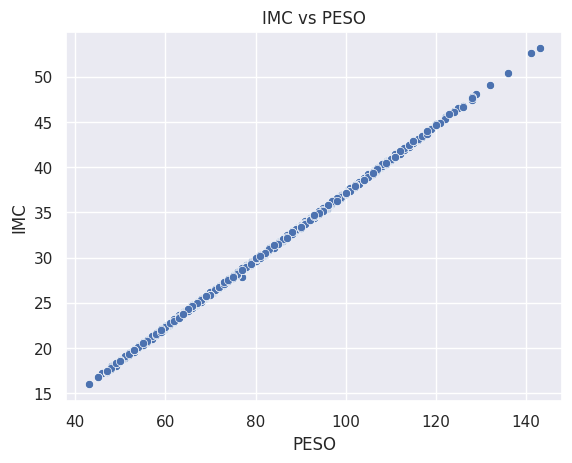

In [ ]:
sns.scatterplot(x="PESO", y="IMC", data=df_wout_null).set_title('IMC vs PESO')

In [ ]:
df_imputed.loc[df_imputed['IMC'].isnull()]

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
107,18,FEMENINO,NaN,78.0,0.0,0,NO,BARCELONA,610,2.785330
162,58,FEMENINO,NaN,89.0,0.0,0,NO,BARCELONA,1036,3.015360
170,21,MASCULINO,NaN,74.0,0.0,0,NO,BARCELONA,175,2.243038
182,45,MASCULINO,NaN,65.0,2.0,1,NO,BARCELONA,717,2.855519


In [ ]:
# Fill nulls
df_imputed.loc[df_imputed['IMC'].isnull(), 'IMC'] = lr.predict(df_imputed.loc[df_imputed['IMC'].isnull(), 'PESO'].values.reshape(-1,1))

df_imputed.isnull().sum()

EDAD           0
SEXO           4
IMC            0
PESO           3
HIJOS          4
TIENE_HIJOS    0
FUMADOR        4
CIUDAD         0
PRECIO         0
LOG_PRECIO     0
dtype: int64

### PESO = f(IMC)

In [ ]:
df_wout_null = df_imputed[(df_imputed['PESO'].notnull()) & (df_imputed['IMC'].notnull())]
X = df_wout_null['IMC'].values.reshape(-1, 1)
y = df_wout_null['PESO'].values

lr = LinearRegression().fit(X, y)

print(lr.score(X, y))

0.9996696965787198


In [ ]:
df_imputed.loc[df_imputed['PESO'].isnull(), 'PESO'] = lr.predict(df_imputed.loc[df_imputed['PESO'].isnull(), 'IMC'].values.reshape(-1,1))

df_imputed.isnull().sum()

EDAD           0
SEXO           4
IMC            0
PESO           0
HIJOS          4
TIENE_HIJOS    0
FUMADOR        4
CIUDAD         0
PRECIO         0
LOG_PRECIO     0
dtype: int64

### HIJOS = f(TIENE HIJOS, EDAD)

In [ ]:
df_imputed[df_imputed['HIJOS'].isnull()]
# A pesar de que no se sabe cuantos hijos tiene, se implica que tiene hijos por los tipo de gastos que hace

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
11,18,FEMENINO,38.665,104.0,NaN,1,NO,BARCELONA,283,2.451786
53,29,MASCULINO,28.975,78.0,NaN,1,NO,BARCELONA,337,2.527630
102,44,FEMENINO,20.235,54.0,NaN,1,SI,BARCELONA,1633,3.212986
183,53,MASCULINO,34.105,92.0,NaN,0,SI,BARCELONA,3605,3.556905


In [ ]:
df_imputed.groupby('TIENE_HIJOS')['HIJOS'].agg(['mean','median','std'])

,mean,median,std
TIENE_HIJOS,,,
0,0.000000,0.0,0.000000
1,1.922164,2.0,0.984965


In [ ]:
# No tiene hijos
df_imputed.loc[(df_imputed['HIJOS'].isnull()) & (df_imputed['TIENE_HIJOS'] == 0), 'HIJOS'] = 0

# Tiene hijos (imponemos 2 hijos)
df_imputed.loc[(df_imputed['HIJOS'].isnull()) & (df_imputed['TIENE_HIJOS'] != 0), 'HIJOS'] = 2

In [ ]:
df_imputed.isnull().sum()

EDAD           0
SEXO           4
IMC            0
PESO           0
HIJOS          0
TIENE_HIJOS    0
FUMADOR        4
CIUDAD         0
PRECIO         0
LOG_PRECIO     0
dtype: int64

### SEXO = f(PESO, EDAD)

In [ ]:
df_imputed[df_imputed['SEXO'].isnull()]
# Basados en el peso y la edad intentar oredecir si es hombre o mujer, no es eticamente correcto pero es factible

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
95,55,NaN,30.685,83.0,0.0,0,SI,BARCELONA,3525,3.547159
116,47,NaN,33.345,90.0,0.0,0,NO,BARCELONA,1740,3.240549
131,38,NaN,28.025,75.0,1.0,1,NO,BARCELONA,506,2.704151
146,34,NaN,33.250,89.0,1.0,1,NO,BARCELONA,466,2.668386


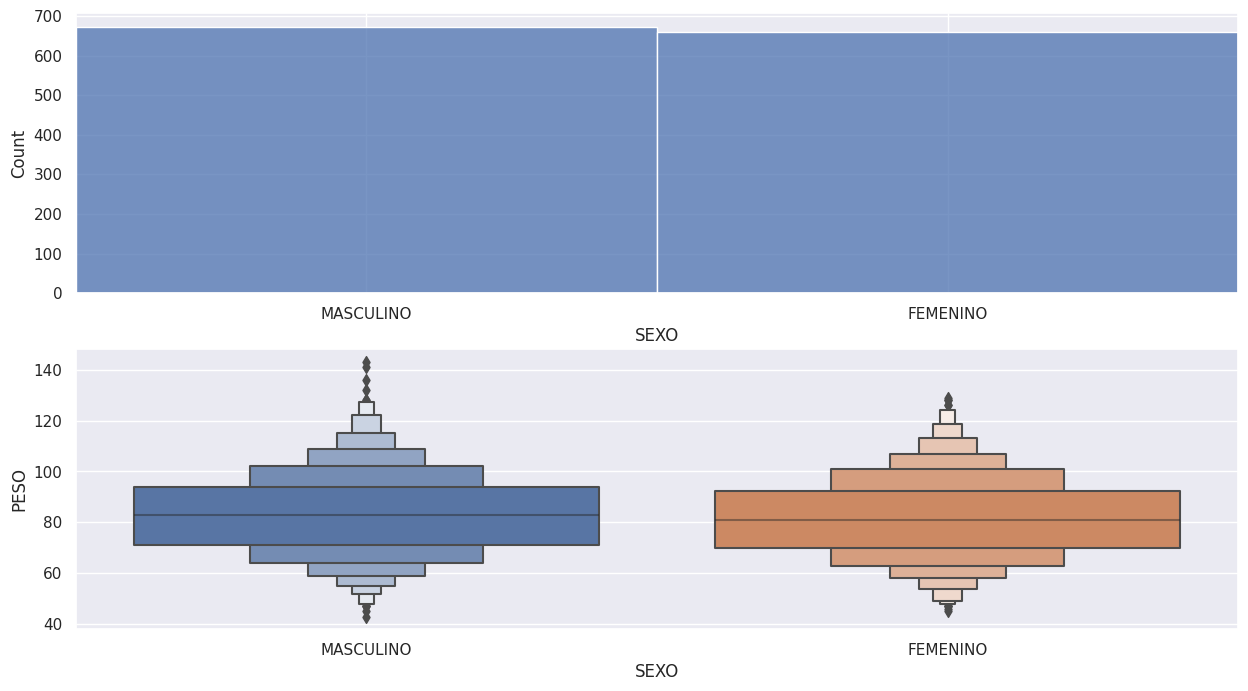

In [ ]:
plot_cat_values(df_imputed, 'SEXO', 'PESO')

In [ ]:
# Los hombres tienden a pesar más que las mujeres, por lo que dejamos que el modelo busque el patrón

In [ ]:
features = ['PESO','EDAD']
target = 'SEXO'

df_wout_null = df_imputed[(df_imputed['SEXO'].notnull()) & (df_imputed['PESO'].notnull())]

X, y = df_wout_null[features], df_wout_null[target]
y = y.map({'MASCULINO': 1, 'FEMENINO': 0}).astype(int)

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
print('Accuracy:', accuracy_score(y, clf.predict(X)))
print('Precision:', precision_score(y, clf.predict(X)))
print('Recall:', recall_score(y, clf.predict(X)))

Accuracy: 0.8964741185296324
Precision: 0.9620034542314335
Recall: 0.8276374442793462


In [ ]:
X_to_fill = df_imputed.loc[(df_imputed['SEXO'].isnull()), features]
y_to_fill = clf.predict(X_to_fill)
y_to_fill = pd.Series(y_to_fill).map({1:'MASCULINO', 0:'FEMENINO'})
y_to_fill

0     FEMENINO
1    MASCULINO
2     FEMENINO
3     FEMENINO
dtype: object

In [ ]:
df_imputed.loc[(df_imputed['SEXO'].isnull()), 'SEXO'] = list(y_to_fill)

In [ ]:
df_imputed.isnull().sum()

EDAD           0
SEXO           0
IMC            0
PESO           0
HIJOS          0
TIENE_HIJOS    0
FUMADOR        4
CIUDAD         0
PRECIO         0
LOG_PRECIO     0
dtype: int64

### FUMADOR = f(EDAD, PESO)

In [ ]:
df_imputed[df_imputed['FUMADOR'].isnull()]

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
206,59,MASCULINO,24.700,66.0,0.0,0,NaN,BARCELONA,1027,3.011570
210,53,FEMENINO,23.750,64.0,2.0,1,NaN,BARCELONA,977,2.989895
218,54,MASCULINO,24.035,65.0,0.0,0,NaN,BARCELONA,869,2.939020
224,27,MASCULINO,32.585,88.0,3.0,1,NaN,BARCELONA,404,2.606381


In [ ]:
features = ['PESO','EDAD']
target = 'FUMADOR'

df_wout_null = df_imputed[(df_imputed[target].notnull())]

X, y = df_wout_null[features], df_wout_null[target]
y = y.map({'SI': 1, 'NO': 0}).astype(int)

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
print('Accuracy:', accuracy_score(y, clf.predict(X)))
print('Precision:', precision_score(y, clf.predict(X)))
print('Recall:', recall_score(y, clf.predict(X)))

Accuracy: 0.945986496624156
Precision: 0.963302752293578
Recall: 0.7664233576642335


In [ ]:
X_to_fill = df_imputed.loc[(df_imputed[target].isnull()), features]
y_to_fill = clf.predict(X_to_fill)
y_to_fill = pd.Series(y_to_fill).map({1:'SI', 0:'NO'})
y_to_fill

0    SI
1    NO
2    NO
3    NO
dtype: object

In [ ]:
df_imputed.loc[(df_imputed[target].isnull()), target] = list(y_to_fill)

In [ ]:
df_imputed.isnull().sum()

EDAD           0
SEXO           0
IMC            0
PESO           0
HIJOS          0
TIENE_HIJOS    0
FUMADOR        0
CIUDAD         0
PRECIO         0
LOG_PRECIO     0
dtype: int64

## Convertir categoricas en booleanos

In [ ]:
df_imputed['HIJOS'] = df_imputed['HIJOS'].astype(int)

In [ ]:
df_prep = df_imputed.copy(deep=True)

In [ ]:
lista_categoricas_2_bool

['SEXO', 'FUMADOR']

In [ ]:
df_prep = pd.get_dummies(data=df_prep,
                               prefix=None,
                               prefix_sep="_",
                               drop_first=True,
                               columns=lista_categoricas_2_bool,
                               dtype="int8")

In [ ]:
df_prep.head()

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,CIUDAD,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI
0,37,29.830,80.0,2,1,BARCELONA,534,2.727541,1,0
1,25,26.220,71.0,0,0,BARCELONA,227,2.356026,1,0
2,52,30.780,83.0,1,1,BARCELONA,900,2.954243,0,0
3,23,23.845,64.0,0,0,BARCELONA,200,2.301030,1,0
4,60,36.005,97.0,0,0,BARCELONA,1102,3.042182,0,0


## One hot encoding

In [ ]:
lista_categoricas

['CIUDAD']

In [ ]:
df_prep = pd.get_dummies(data=df_prep,
                               prefix=None,
                               prefix_sep="_",
                               columns=lista_categoricas,
                               dtype="int8")

In [ ]:
df_prep.head()

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,37,29.830,80.0,2,1,534,2.727541,1,0,1,0,0,0
1,25,26.220,71.0,0,0,227,2.356026,1,0,1,0,0,0
2,52,30.780,83.0,1,1,900,2.954243,0,0,1,0,0,0
3,23,23.845,64.0,0,0,200,2.301030,1,0,1,0,0,0
4,60,36.005,97.0,0,0,1102,3.042182,0,0,1,0,0,0


## Discretizar variables continuas

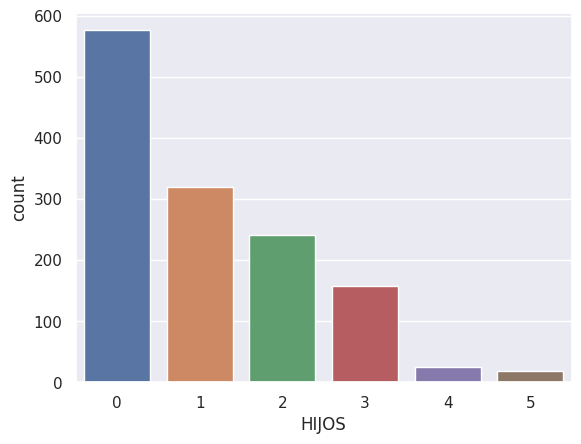

In [ ]:
sns.countplot(data=df_prep, x='HIJOS')
plt.show()

In [ ]:
#Creamos tramos categoricos para rangos determinados de la variable continua HIJOS
df_prep['HIJOS_N'] = df_prep.HIJOS.apply(lambda x:
                                               str(x) if x<=2
                                               else '3_O_MAS'
                                              )
df_prep.HIJOS_N.value_counts()

0          576
1          320
2          241
3_O_MAS    200
Name: HIJOS_N, dtype: int64

<Axes: xlabel='HIJOS_N', ylabel='count'>

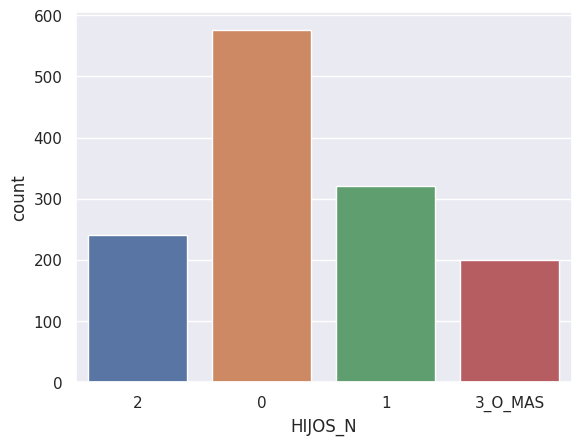

In [ ]:
sns.countplot(data=df_prep,x='HIJOS_N')

In [ ]:
df_prep = pd.get_dummies(data=df_prep,
                               prefix=None,
                               prefix_sep="_",
                               columns=["HIJOS_N"],
                               dtype="int8")
df_prep.drop('HIJOS',axis=1, inplace=True)
df_prep.head()

,EDAD,IMC,PESO,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,HIJOS_N_0,HIJOS_N_1,HIJOS_N_2,HIJOS_N_3_O_MAS
0,37,29.830,80.0,1,534,2.727541,1,0,1,0,0,0,0,0,1,0
1,25,26.220,71.0,0,227,2.356026,1,0,1,0,0,0,1,0,0,0
2,52,30.780,83.0,1,900,2.954243,0,0,1,0,0,0,0,1,0,0
3,23,23.845,64.0,0,200,2.301030,1,0,1,0,0,0,1,0,0,0
4,60,36.005,97.0,0,1102,3.042182,0,0,1,0,0,0,1,0,0,0


## Eliminar variables altamente correlacionadas (>95%)

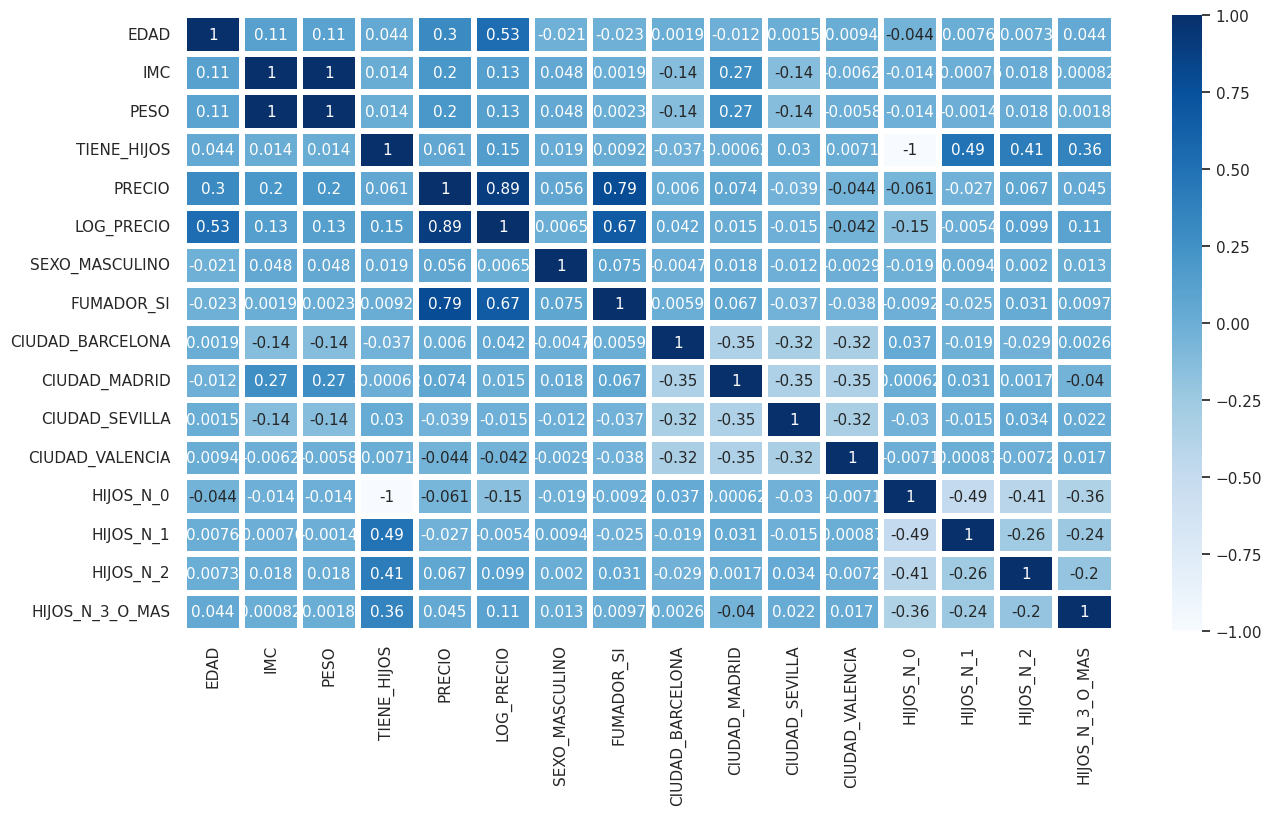

In [ ]:
corr = df_prep.corr()
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
ax=sns.heatmap(corr,cmap='Blues', annot=True, linewidths=3, fmt=".2g", annot_kws={"size":11}) # font size

In [ ]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [ ]:
correlation(df_prep, 0.95)

,F1,F2,CORR
0,PESO,IMC,0.999835
1,HIJOS_N_0,TIENE_HIJOS,-1.0


Hay una fuerte correlación entre algunas features del dataset. Eliminamos el aquella que tiene menor coeficiente de correlacion de Pearson con el target.

In [ ]:
def print_corr(feat1,feat2):
  print('Correlacion ',feat1,'-',feat2,': ',df_prep[[feat1,feat2]].corr().iloc[0,1])

In [ ]:
print_corr(TARGET,'PESO')
print_corr(TARGET,'IMC')


Correlacion  LOG_PRECIO - PESO :  0.1325792897003792
Correlacion  LOG_PRECIO - IMC :  0.13284323225235048


In [ ]:
print_corr(TARGET,'HIJOS_N_0')
print_corr(TARGET,'TIENE_HIJOS')


Correlacion  LOG_PRECIO - HIJOS_N_0 :  -0.14908494825837418
Correlacion  LOG_PRECIO - TIENE_HIJOS :  0.14908494825837412


In [ ]:
df_prep.drop(['IMC','HIJOS_N_0'],axis=1, inplace=True)

In [ ]:
from scipy.stats import spearmanr

spearmanr(df_prep['PESO'], df[TARGET])

SignificanceResult(statistic=0.11965378498505667, pvalue=1.150207874557174e-05)

## Estandarización y normalización

* En la mayoria de tecnicas de entrenamiento de ML es necesario estandarizar las variables del dataset:
modelos lineales como la regresión lineal, modelos basados en distancias espaciales como el Kmeans o las redes neuronales.
* ¿Cuando no? Modelos con árboles de decision.


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1337 non-null   int64  
 1   PESO              1337 non-null   float64
 2   TIENE_HIJOS       1337 non-null   int64  
 3   PRECIO            1337 non-null   int64  
 4   LOG_PRECIO        1337 non-null   float64
 5   SEXO_MASCULINO    1337 non-null   int8   
 6   FUMADOR_SI        1337 non-null   int8   
 7   CIUDAD_BARCELONA  1337 non-null   int8   
 8   CIUDAD_MADRID     1337 non-null   int8   
 9   CIUDAD_SEVILLA    1337 non-null   int8   
 10  CIUDAD_VALENCIA   1337 non-null   int8   
 11  HIJOS_N_1         1337 non-null   int8   
 12  HIJOS_N_2         1337 non-null   int8   
 13  HIJOS_N_3_O_MAS   1337 non-null   int8   
dtypes: float64(2), int64(3), int8(9)
memory usage: 106.7 KB


### Estandarización

In [ ]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_prep)

In [ ]:
df_scaled = pd.DataFrame(np_scaled, columns=df_prep.columns)

In [ ]:
df_scaled

,EDAD,PESO,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,HIJOS_N_1,HIJOS_N_2,HIJOS_N_3_O_MAS
0,-0.158282,-0.151339,0.869999,-0.567577,-0.364337,0.991806,-0.508867,1.768203,-0.611638,-0.565546,-0.566698,-0.560938,2.132538,-0.419406
1,-1.013039,-0.699949,-1.149426,-0.871894,-1.295813,0.991806,-0.508867,1.768203,-0.611638,-0.565546,-0.566698,-0.560938,-0.468925,-0.419406
2,0.910164,0.031531,0.869999,-0.204774,0.204056,-1.008261,-0.508867,1.768203,-0.611638,-0.565546,-0.566698,1.782730,-0.468925,-0.419406
3,-1.155499,-1.126646,-1.149426,-0.898659,-1.433700,0.991806,-0.508867,1.768203,-0.611638,-0.565546,-0.566698,-0.560938,-0.468925,-0.419406
4,1.480002,0.884924,-1.149426,-0.004539,0.424539,-1.008261,-0.508867,1.768203,-0.611638,-0.565546,-0.566698,-0.560938,-0.468925,-0.419406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,-1.440418,-1.675256,-1.149426,-0.954169,-1.791401,-1.008261,-0.508867,-0.565546,-0.611638,-0.565546,1.764609,-0.560938,-0.468925,-0.419406
1333,0.910164,1.311621,0.869999,-0.244425,0.154553,0.991806,-0.508867,-0.565546,-0.611638,-0.565546,1.764609,-0.560938,2.132538,-0.419406
1334,-1.155499,0.458228,-1.149426,-0.204774,0.204056,-1.008261,-0.508867,-0.565546,-0.611638,-0.565546,1.764609,-0.560938,-0.468925,-0.419406
1335,0.910164,2.286928,0.869999,-0.154220,0.264074,-1.008261,-0.508867,-0.565546,-0.611638,-0.565546,1.764609,-0.560938,-0.468925,2.384324


In [ ]:
(df_prep['EDAD'] - df_prep['EDAD'].mean()) / df_prep['EDAD'].std()

0      -0.158223
1      -1.012660
2       0.909823
3      -1.155067
4       1.479448
          ...   
1333   -1.439879
1334    0.909823
1335   -1.155067
1336    0.909823
1337   -1.297473
Name: EDAD, Length: 1337, dtype: float64

### Normalización (alternativa)

En caso de que una variable no se ajuste a una distribucion gaussiana

In [ ]:
scaler_min_max = MinMaxScaler()

In [ ]:
np_norm = scaler_min_max.fit_transform(df_prep) # Obtenemos un array por eso hay que volverla DataFrame
df_norm = pd.DataFrame(np_norm, columns=df_prep.columns)

Compara

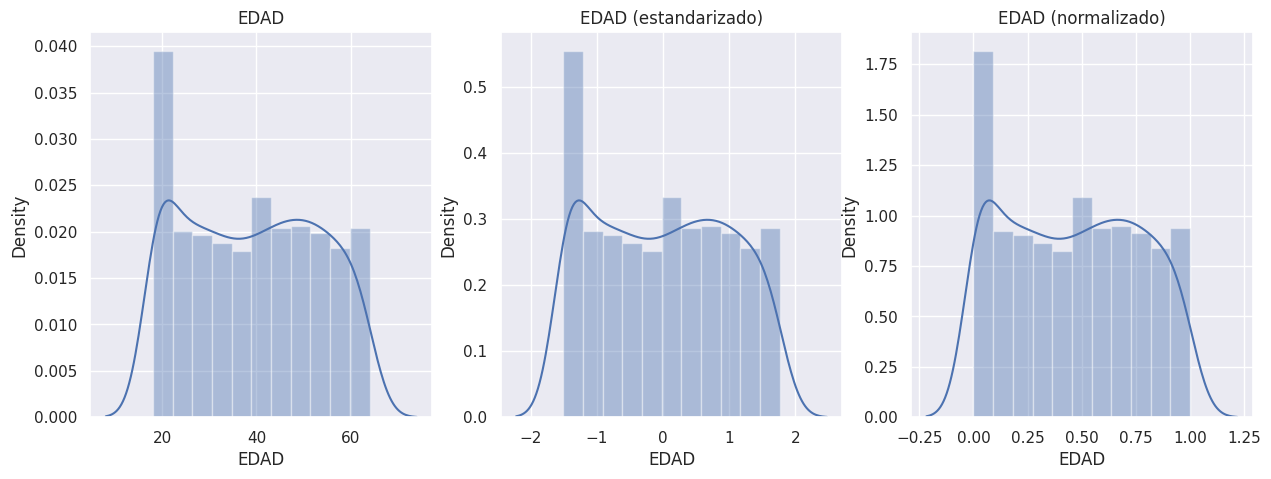

In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1,3,1)
sns.distplot(df["EDAD"]).set_title('EDAD')
ax = plt.subplot(1,3,2)
sns.distplot(df_scaled["EDAD"]).set_title('EDAD (estandarizado)')
ax = plt.subplot(1,3,3)
sns.distplot(df_norm["EDAD"]).set_title('EDAD (normalizado)')
plt.show()

...Y LISTO PARA ENTRENAR UN MODELO ML!!

In [ ]:
features = df_prep.columns
features = features.drop(TARGET)
features = features.drop('PRECIO')

X = df_prep[features]
y = df_prep[TARGET]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth = 7)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def reg_metrics(y, y_pred):
    print('RMSE:',np.sqrt(mean_squared_error(y, y_pred)))
    print('MAE:',mean_squared_error(y, y_pred))
    print('R2:',r2_score(y, y_pred))

print('---- TRAIN ----')
reg_metrics(y_train, y_train_pred)
print('---- TEST ----')
reg_metrics(y_test, y_test_pred)

---- TRAIN ----
RMSE: 0.11727433612234953
MAE: 0.013753269912937816
R2: 0.9171775833311787
---- TEST ----
RMSE: 0.2087637686863251
MAE: 0.043582311116117455
R2: 0.6992625999196267


In [ ]:
# Feature importances

In [ ]:
importance = model.feature_importances_
feature_importances = pd.DataFrame({'columns':X_train.columns, 'importance':importance})
feature_importances.sort_values('importance', ascending=False)

,columns,importance
4,FUMADOR_SI,0.504970
0,EDAD,0.401324
1,PESO,0.052669
2,TIENE_HIJOS,0.017228
3,SEXO_MASCULINO,0.005587
5,CIUDAD_BARCELONA,0.005441
11,HIJOS_N_3_O_MAS,0.004213
6,CIUDAD_MADRID,0.003185
8,CIUDAD_VALENCIA,0.002774
7,CIUDAD_SEVILLA,0.001054
